In [49]:
# import dependancies and connect to sql server

import pandas as pd 
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine
from config import password
engine = create_engine('postgresql://postgres:{}@localhost:5432/Pewlett_Hackard'.format(password))
conn = engine.connect()

In [25]:
#import data from SQL tables
employees = pd.read_sql("SELECT * FROM employees", con=engine)
salaries = pd.read_sql("Select * FROM salaries", con=engine)
titles = pd.read_sql("Select * FROM titles", con=engine)

In [28]:
#rename for columns for merges
employees.rename(columns={'emp_title_id':'title_id'}, inplace=True)
employees.keys()

Index(['emp_no', 'title_id', 'birth_date', 'first_name', 'last_name', 'sex',
       'hire_date'],
      dtype='object')

In [30]:
#merge data into single datafram for analysis
merged_db = pd.merge(titles, employees, on='title_id', how='left')
merged_db = pd.merge(merged_db, salaries, on='emp_no', how='left')
merged_db.head()

,title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date,salary
0,s0001,Staff,473302,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,s0001,Staff,421786,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
2,s0001,Staff,273487,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087
3,s0001,Staff,246449,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084
4,s0001,Staff,48085,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016


<AxesSubplot:ylabel='Frequency'>

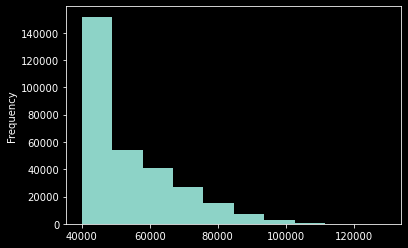

In [68]:
#histogram
merged_db['salary'].plot.hist(grid=False, backend='matplotlib')

<AxesSubplot:xlabel='title'>

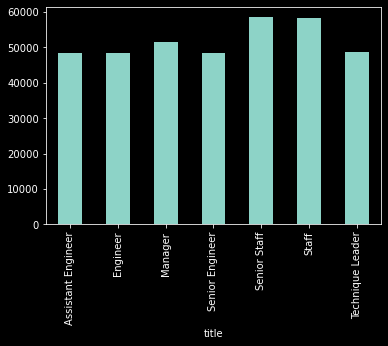

In [70]:
#barchart
sal_by_title = merged_db.copy()
sal_by_title = sal_by_title.groupby('title')['salary'].mean()
sal_by_title.plot.bar()

In [71]:
#my id number loc
my_id_number = merged_db.copy().loc[merged_db['emp_no']==499942]
my_id_number

,title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date,salary
293367,e0004,Technique Leader,499942,1/10/1963,April,Foolsday,F,2/10/1997,40000
